## **COMP3212 Computational Biology Tutorial 2**
Student ID: 30582105

Email ID: thyl1e18

### **Task 1**
Write a program to implement Needleman-Wunsch for proteins

- You will need the blosum50 scoring matrix

- You can use any programming language

- Run this on HEAGAWGHEE versus PAWHEAE

- Compare this to page 23 in lecture 5

- Match the protein sequence SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL with PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY


In [1]:
import numpy as np
import sys

### 1. Cost for deletion/substitution = -8

### 2. Condition for Global Alignment
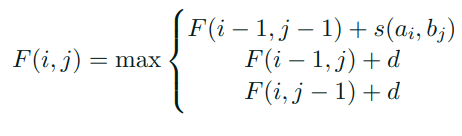

In [2]:
del_pen = -8
def blosum_to_data(blosum_filepath):
  with open(blosum_filepath, "r") as file1:
    text = file1.read().upper()
    l = [[*map(int, line.split())] for line in text.split('\n')]
  return l
def blosum_lookup(mat,prot1,prot2):
  indexdict = {'A':0, 'R':1 ,'N':2, 'D':3, 'C':4, 'Q':5, 'E':6, 'G':7, 'H':8, 'I':9,\
          'L':10, 'K':11, 'M':12, 'F':13, 'P':14, 'S':15, 'T':16, 'W':17, 'Y':18, 'V':19}
  logodd = mat[indexdict[prot1]][indexdict[prot2]]
  return logodd
##########################################################################################################################
def needleman_wunsch(blosum_table,seq1,seq2):
  # Forward algorithm
  # Create a matrix table global alignment
  matrix_table = np.zeros([len(seq1)+1,len(seq2)+1])
  # Due to the direction of deletion/insertion/substitution can be happen in simultaneously provided if the likelyhood score is same,
  # Therefore a 3D boolean vector matrix is needed
  #let say :
  # create a 3D boolean matrix to specify direction of the element from
  # condition 1: direction of substitution = direction_matrix[i][j][0] = 1(True)
  # condition 2: direction of horizontal (deletion) = direction_matrix[i][j][1] = 2(True)
  # condition 3: direction of vertical (insertion) = direction_matrix[i][j][2] = 3(True)
  direction_matrix = np.zeros([len(seq1)+1,len(seq2)+1,3])
  for col in range(1,matrix_table.shape[1]):
    matrix_table[0][col] = matrix_table[0][col-1] + del_pen
    direction_matrix[0][col][1] = True
  for row in range(1,matrix_table.shape[0]):
    matrix_table[row][0] = matrix_table[row-1][0] + del_pen
    direction_matrix[row][0][2] = True
  for row in range(1,matrix_table.shape[0]):
    for col in range(1,matrix_table.shape[1]):
      if ((matrix_table[row-1][col]+del_pen) >=(matrix_table[row][col-1]+del_pen)) and \
      ((matrix_table[row-1][col]+del_pen) >=(matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1])) ):
        matrix_table[row][col] = matrix_table[row-1][col]+del_pen
        direction_matrix[row][col][2] = True #vertical
        #direction_matrix_simp[row][col] = 3
      if ((matrix_table[row][col-1]+del_pen) >=(matrix_table[row-1][col]+del_pen)) and \
      ((matrix_table[row][col-1]+del_pen) >=(matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1])) ):
        matrix_table[row][col] = matrix_table[row][col-1]+del_pen
        direction_matrix[row][col][1] = True #horizontal
        #direction_matrix_simp[row][col] = 2
      if ((matrix_table[row-1][col-1]+ blosum_lookup(blosum_table,seq1[row-1],seq2[col-1])) >=(matrix_table[row-1][col]+del_pen)) and \
      ((matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1])) >=(matrix_table[row][col-1]+del_pen)):
        matrix_table[row][col] = matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1])
        direction_matrix[row][col][0] = True
        #direction_matrix_simp[row][col] = 1
  #print(matrix_table)
  #print(direction_matrix)
  return matrix_table, direction_matrix
###########################################################################################################################
def Alignment_print(blosum_table, seq1, seq2):
  table, direction = needleman_wunsch(blosum_table,seq1,seq2)
  # Backward Algorithm
  aligned_seq1,aligned_seq2 = [],[]
  #initialise a pointer to the table index
  ptr = np.array([len(seq1),len(seq2)])
  while ~(ptr[0] == 0 and ptr[1] == 0):
    if direction[ptr[0]][ptr[1]][0]==1:
      aligned_seq1.append(seq1[ptr[0]-1])
      aligned_seq2.append(seq2[ptr[1]-1])
      ptr[0]-=1
      ptr[1]-=1
    elif direction[ptr[0]][ptr[1]][1]==1: #horizontal
      aligned_seq1.append('-')
      aligned_seq2.append(seq2[ptr[1]-1])
      ptr[1]-=1
    elif direction[ptr[0]][ptr[1]][2]==1: #vertical
      aligned_seq1.append(seq1[ptr[0]-1])
      aligned_seq2.append('-')
      ptr[0]-=1
  aligned_seq1 = ' '.join(aligned_seq1[::-1])
  aligned_seq2 = ' '.join(aligned_seq2[::-1])
  #print(aligned_seq1)
  #print(aligned_seq2)
  return aligned_seq1, aligned_seq2



In [3]:
#np.set_printoptions(threshold=sys.maxsize)
blosum = blosum_to_data('blosum50.txt')
align1,align2 = Alignment_print(blosum,'HEAGAWGHEE','PAWHEAE')
print(align1)
for i in range(len(align1)//2+1):
  print('|',end = ' ')
print('')
print(align2)
matrix_1,vector_1 = needleman_wunsch(blosum,'HEAGAWGHEE','PAWHEAE')
print(matrix_1)
align3,align4 = Alignment_print(blosum,'SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL','PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY')
print(align3)
for i in range(len(align3)//2+1):
  print('|',end = ' ')
print('')
print(align4)

H E A G A W G H E - E
| | | | | | | | | | | 
- - P - A W - H E A E
[[  0.  -8. -16. -24. -32. -40. -48. -56.]
 [ -8.  -2. -10. -18. -14. -22. -30. -38.]
 [-16.  -9.  -3. -11. -18.  -8. -16. -24.]
 [-24. -17.  -4.  -6. -13. -16.  -3. -11.]
 [-32. -25. -12.  -7.  -8. -16. -11.  -6.]
 [-40. -33. -20. -15.  -9.  -9. -11. -12.]
 [-48. -41. -28.  -5. -13. -12. -12. -14.]
 [-56. -49. -36. -13.  -7. -15. -12. -15.]
 [-64. -57. -44. -21.  -3.  -7. -15. -12.]
 [-72. -65. -52. -29. -11.   3.  -5.  -9.]
 [-80. -73. -60. -37. -19.  -5.   2.   1.]]
- S A L P Q P T T P V S S F T S G S M L G R T D T A L T N T Y S A L -
| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | 
P S P T M E A V T S V E A - S T A S H P H S T S S Y F A T T Y Y H L Y


### **Task 2**

- Modify your program to implement the Smith-Waterman algorithm
- Again run this on HEAGAWGHEE versus PAWHEAE
- Compare this to page 5 in lecture 6
- Find the best local match between MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY 
and TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI

### 1. Conditions
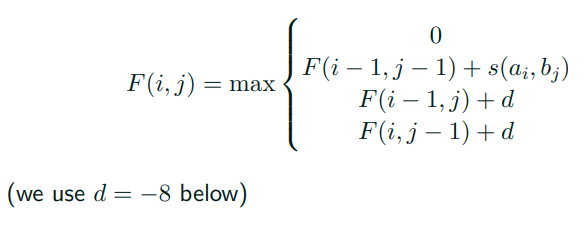



In [4]:
def smith_waterman(blosum_table,seq1,seq2):
  # Forward algorithm
  # Create a matrix table local alignment
  matrix_table = np.zeros([len(seq1)+1,len(seq2)+1])
  # Create direction matrix
  # condition 0: direction of none = direction[i][j][(0-2)] = 0
  # condition 1: direction of substitution = direction_matrix[i][j][0] = 1(True)
  # condition 2: direction of horizontal (deletion) = direction_matrix[i][j][1] = 2(True)
  # condition 3: direction of vertical (insertion) = direction_matrix[i][j][2] = 3(True)
  direction_matrix = np.zeros([len(seq1)+1,len(seq2)+1,3])
  # direction and score of first row and column is 0 since it meet condition 0
  for row in range(1,matrix_table.shape[0]):
    for col in range(1,matrix_table.shape[1]):
      if ((matrix_table[row-1][col]+del_pen) >=(matrix_table[row][col-1]+del_pen)) and \
      ((matrix_table[row-1][col]+del_pen) >= \
      (matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1])) ) \
      and (matrix_table[row-1][col]+del_pen) > 0:
        matrix_table[row][col] = matrix_table[row-1][col]+del_pen
        direction_matrix[row][col][2] = True #vertical
        #direction_matrix_simp[row][col] = 3
      if ((matrix_table[row][col-1]+del_pen) >=(matrix_table[row-1][col]+del_pen)) and \
      ((matrix_table[row][col-1]+del_pen) >= \
      (matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1]))) \
      and (matrix_table[row][col-1]+del_pen) > 0:
        matrix_table[row][col] = matrix_table[row][col-1]+del_pen
        direction_matrix[row][col][1] = True #horizontal
        #direction_matrix_simp[row][col] = 2
      if ((matrix_table[row-1][col-1]+ blosum_lookup(blosum_table,seq1[row-1],seq2[col-1])) >= \
      (matrix_table[row-1][col]+del_pen)) and \
      ((matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1])) >= \
      (matrix_table[row][col-1]+del_pen)) and \
      (matrix_table[row-1][col-1]+ blosum_lookup(blosum_table,seq1[row-1],seq2[col-1])) > 0:
        matrix_table[row][col] = matrix_table[row-1][col-1]+ blosum_lookup(blosum_table, seq1[row-1], seq2[col-1])
        direction_matrix[row][col][0] = True
  print(matrix_table)
  #print(direction_matrix)
  return matrix_table, direction_matrix
def local_alignment(blosum_table,seq1,seq2):
  table, direction = smith_waterman(blosum_table,seq1,seq2)
  # Backward Algorithm
  aligned_seq1,aligned_seq2 = [],[]
  # find the location of highest score
  table = np.array(table)
  indices = np.where(table == table.max())
  #initialise a pointer to the table index
  ptr = np.array([indices[0][0],indices[1][0]])
  while ~(table[ptr[0]][ptr[1]] == 0 ):
    if direction[ptr[0]][ptr[1]][0]==1:
      aligned_seq1.append(seq1[ptr[0]-1])
      aligned_seq2.append(seq2[ptr[1]-1])
      ptr[0]-=1
      ptr[1]-=1
    elif direction[ptr[0]][ptr[1]][1]==1: #horizontal
      aligned_seq1.append('-')
      aligned_seq2.append(seq2[ptr[1]-1])
      ptr[1]-=1
    elif direction[ptr[0]][ptr[1]][2]==1: #vertical
      aligned_seq1.append(seq1[ptr[0]-1])
      aligned_seq2.append('-')
      ptr[0]-=1
  aligned_seq1 = ' '.join(aligned_seq1[::-1])
  aligned_seq2 = ' '.join(aligned_seq2[::-1])
  #print(aligned_seq1)
  #print(aligned_seq2)
  return aligned_seq1, aligned_seq2

In [5]:
#table, direction = smith_waterman(blosum,'PAWHEAE','HEAGAWGHEE')
print('Local Alignment of Protein Sequence: PAWHEAE and HEAGAWGHEE :')
align5,align6 = local_alignment(blosum,'PAWHEAE','HEAGAWGHEE')
print(align5)
for i in range(len(align5)//2+1):
  print('|',end = ' ')
print('')
print(align6)
print(' ')
print('Local Alignment of Protein Sequence: MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY and HEAGAWGHEETDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI :')
align7,align8 = local_alignment(blosum,'MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY','HEAGAWGHEETDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI')
print(align7)
for i in range(len(align7)//2+1):
  print('|',end = ' ')
print('')
print(align8)

Local Alignment of Protein Sequence: PAWHEAE and HEAGAWGHEE :
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0. 20. 12.  4.  0.  0.]
 [ 0. 10.  2.  0.  0.  0. 12. 18. 22. 14.  6.]
 [ 0.  2. 16.  8.  0.  0.  4. 10. 18. 28. 20.]
 [ 0.  0.  8. 21. 13.  5.  0.  4. 10. 20. 27.]
 [ 0.  0.  6. 13. 18. 12.  4.  0.  4. 16. 26.]]
A W - H E
| | | | | 
A W G H E
 
Local Alignment of Protein Sequence: MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY and HEAGAWGHEETDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI :
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   2.]
 [  0.   1.   2. ...   2.   1.   0.]
 ...
 [  0.   0.   0. ... 141. 156. 169.]
 [  0.   0.   0. ... 133. 148. 161.]
 [  0.   2.   0. ... 125. 140. 153.]]
H S G V N Q L G G V F V N G R P L P D S T R Q K I V E L A H S G A R P C D I S R I
| | | | | | | | | | | | | | | | | | | | | | | | | | | | |

## **Task 3**
- We are going to test the BLAST algorithm
- Download the Pax6 protein for the mouse by going to http://www.uniprot.org/uniprot/P63015 choose the "Format" tab and choose the FASTA (canonical) format
- Do the sacme for the eyeless protein for the fruit fly http://www.uniprot.org/uniprot/O96791
- Perform a BLAST sequence comparison using the web service at https://blast.ncbi.nlm.nih.gov

### **Explanation**: BlastP eyeless protein for the fruit fly
1. Blastp algorithm is used to for the query sequence search
2. Database used is non-redundant protein sequence(nr) organism name: 'Drosophila melanogaster'
3. The are many protein sequence in the fruitfly match the query sequency with accuracy up to 100% also to 83%.
4. The sequence accuracy up to 100% maybe the protein sequence extracted to the text file.
5. There are maybe similar protein sequences in the RNA of one organism,it could be different proteins but with similar sequence since one DNA sequence coded for one organism.
Figure 1. Distribution of the top 35 Blast Hits on subsject sequences
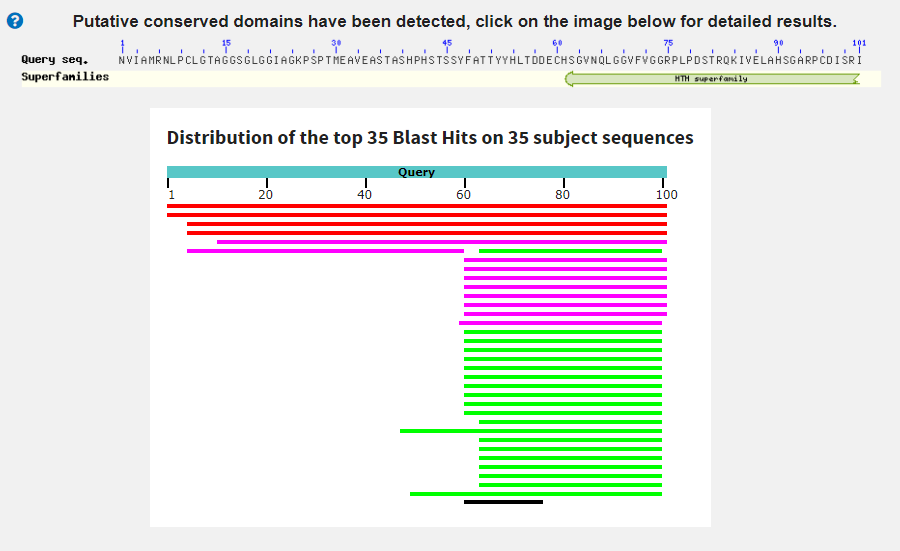

Figure 2. Protein segment compared to the search querry(87%) similarity
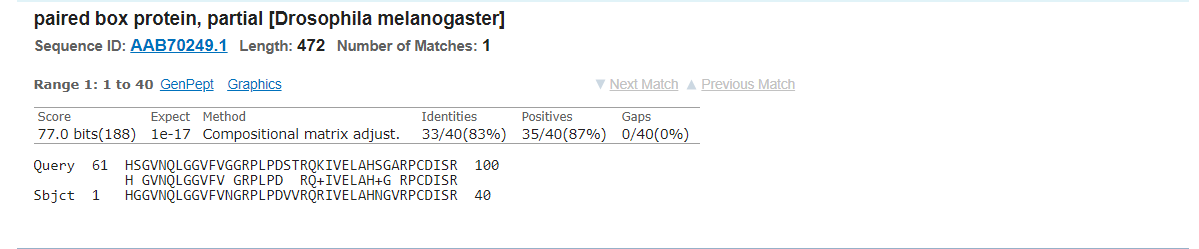
Figure 3. Protein segment compared to the search querry(94%) similarity
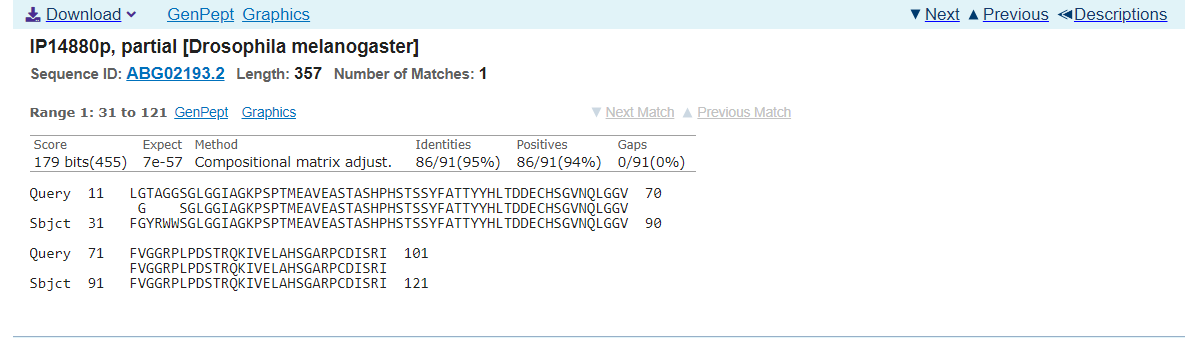
Figure 4. Protein segment compared to the search querry(100%) similarity
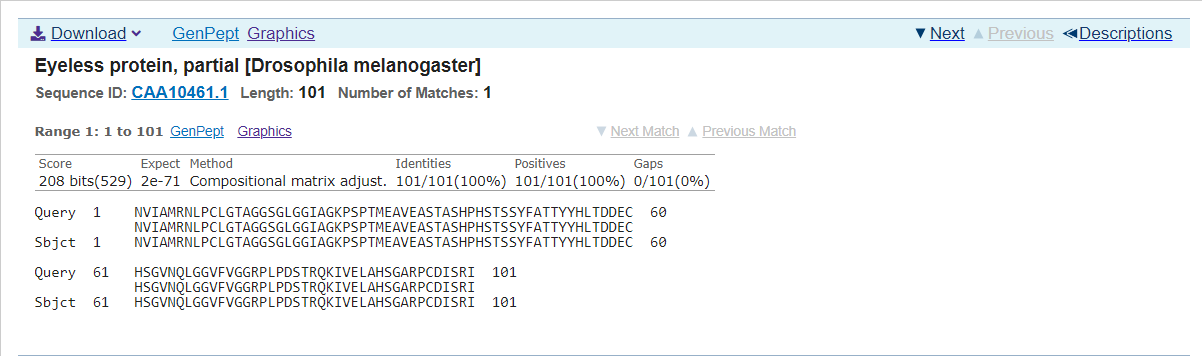

### **Explanation:** BlastP for P63015|PAX6_Mouse Mouse Protein 
1. Figure 5 is the distribution of top 101 Blast that has higher similaroty index. The colour represent the alignment scores, it appears protein sequence with shorter alignment has lower score,while the higher the better.
2. Figure 7 only shows 64% similarity this may because it is a different protein produced by mouse such that it is the next sequence unit of RNA which synthesies the protein. Also name of protein = Pax-7 isoform while the query sequence is from PAX6_Mouse.

Figure 5. 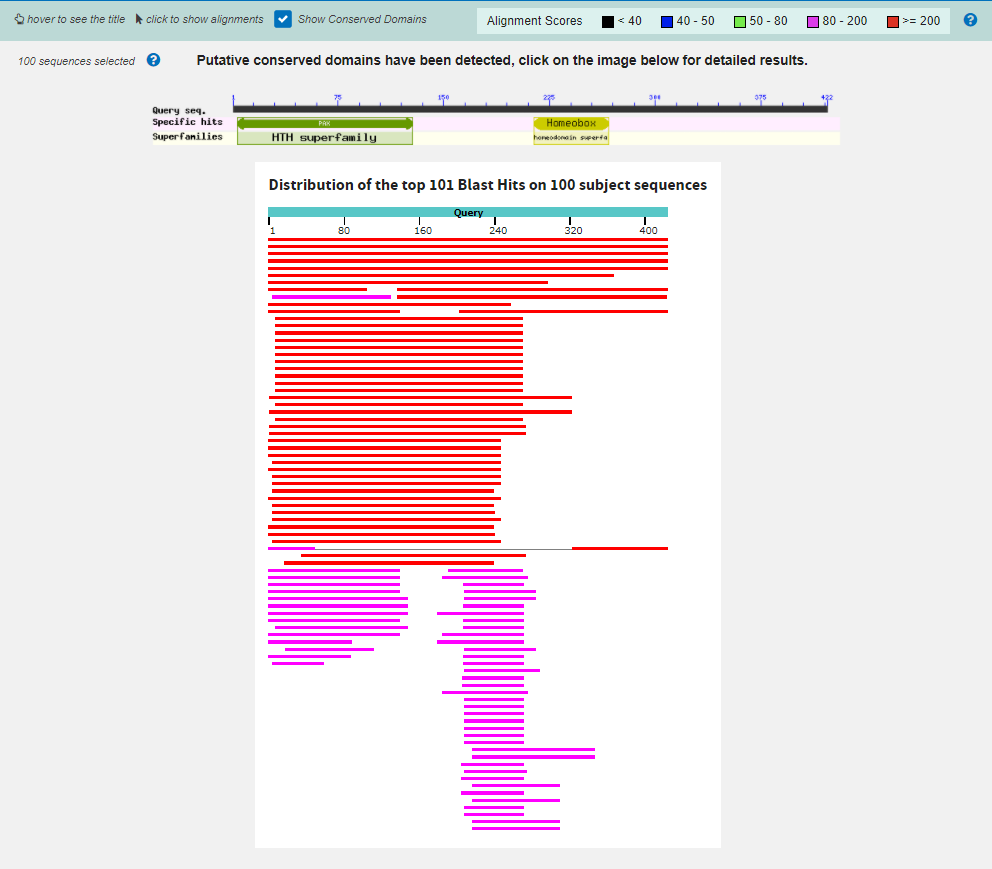
Figure 6. An example of gene alignment of the search query, similarity index(99%)
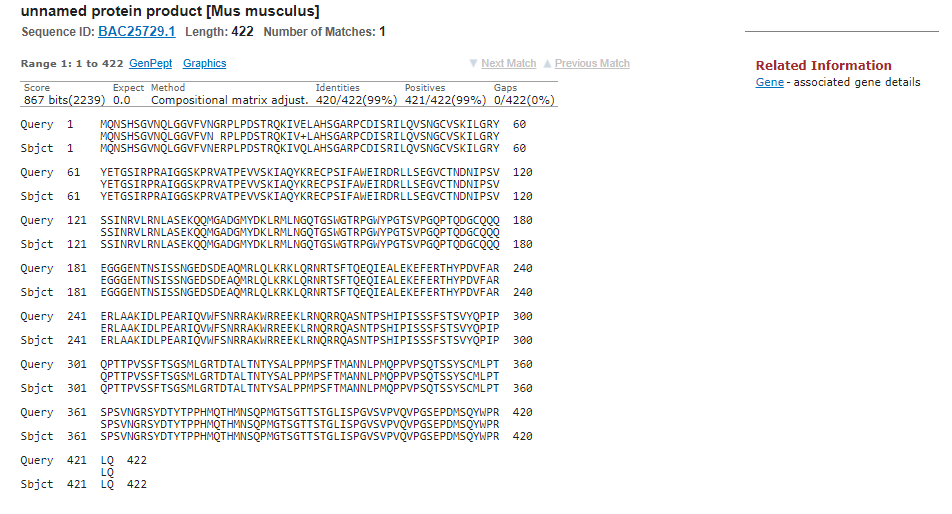
Figure 7. Similarity Index(64%)
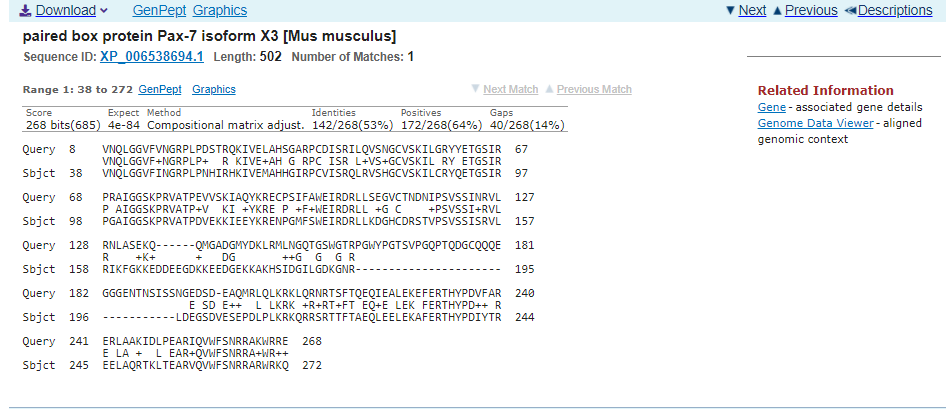


### **Another way to approach:** BlastP for Fruitfly's O96791_DROME Eyeless protein on Mouse protein sequence 
1. The distribution of protein sequence shows very low alignment score, this is because the protein of fruit flies use to alignment mouse protein, both are different species, so low similarity.
2. Figure 10. shows use of tBlastn using O96791_DROME fruitfly protein to search for itself nucleotide database. Basically the result will be same just that the database search are in DNA domain and it will be translated to protein domain.

Figure 8. Distribution of Top 61 Blast hits with high similarity
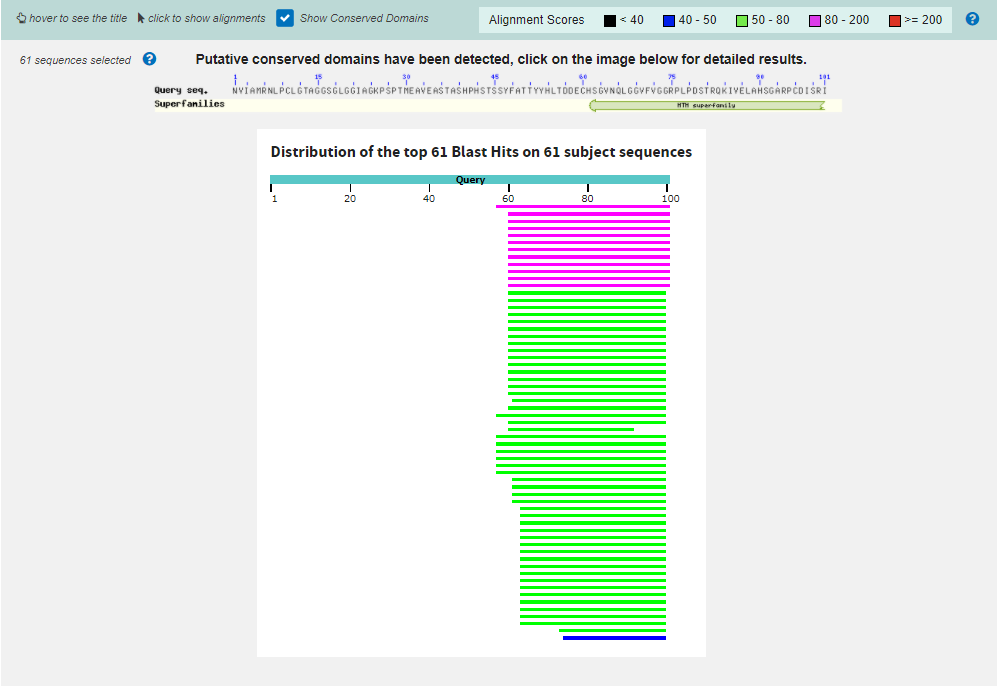
Figure 9. O96791_DROME align with PAX6 protein isoform (90%)
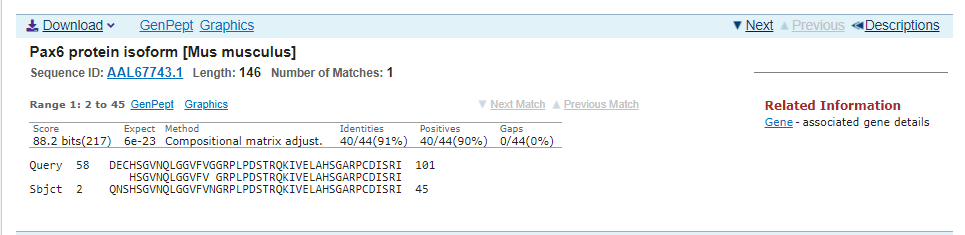
Figure 10: O96791_DROME to Fruitfly itself using tblastn algorithm
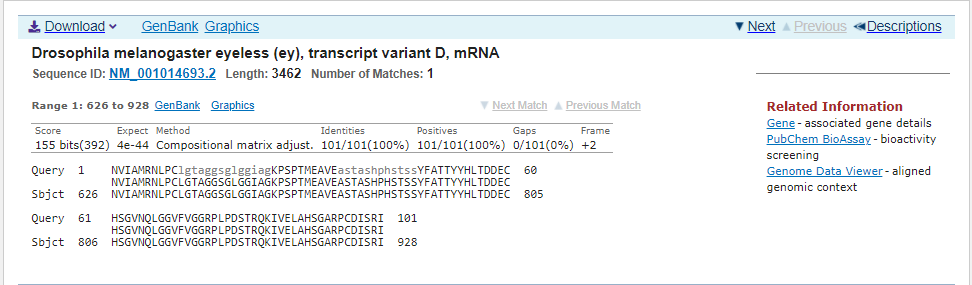


## **Task 4**
- Program the following HMM to generate CG rich regions
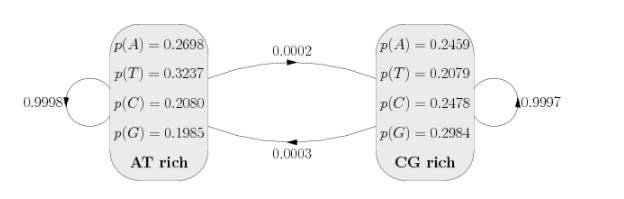

simulated sequence: CCGAAGGGAAATCTCTCTATCGACGACCTGTAGAGCCTTTGGACGGGGCTCTTTCGGCCCCGGTGGTTGACTGGGCAAGGATCGCAGATCACGGCAGTGTCAGTATGGGCGGCGGACGACCCCCCGGTATGCACTACGCAACCCACGGTAACCGGAACAGGCGTTGCGCGAGAACGGAGGTGGATTTACTGGGCCACTCGCCCGCATTGGACATAAGGGACTGTCTTTTCACGGGCGAACAGGCATGACGAGTAAGGAGGCGCGAACGCTGGGAAGCGTGTCCGTTGAGGACAAGAGTTACAATGGCCAGTACAGAGAGGAAGCCTAATCGGTTGGGCTTTGGTTTCGACACCCGCCGCAGTCATACACTGCAGTACACGTCCAGGCCCTTTGAGGAGCCCGCGAACGCGCGATTCAGGTCAAAAGTAGTGAGAGTGACGAGCCGGTAATCGGACTATTTTCGGCAGTTAACGATATCTGTGTTCCGAAAGCAATCGCGGCGGGCAACGAGCCGGTGTCCATTGGGGTTGAGCGTATGCTCGACGCCGCAAACAGAGGCCCACGGTCACGCGGCCTCTGCCACCACAATCTGTACTAAAGGTCTTCCCGAATATCCGAATTTTGAAGGAGGCCAGTTTATCCATAATTATCACCTTCGCCTTTGGAGGCGCATAGGGTTTAGCTTTAGTCGCAAAGAGGTGAATACGCTTTATGAGACGTGCCGATTGTGGGCTGTGACCGGGGTCGGCCGGCACCGCCATCATTTACCTGAGCGCCGGCCAGTTTGATAGAAGCGTCGTGCCAACTCGCGAAACCAGTTAGGAATCGGTGTTGCTGGCTCGGCTACGGAGCGGTCAAGAGGCCAGAGCAACAAAGAGATCTACCAGTTGATAAACAACAAAGCCTGCGGAAGTCGTATACTGCCACAAGTGCAGGTAAACTGCAGCTACGCTCTGCCTTTGCAAAGCTGCGATAAGACT

Text(0.5, 1.0, '"1s" represent sequence in CG rich region and "0s" represent sequence in AT rich region')

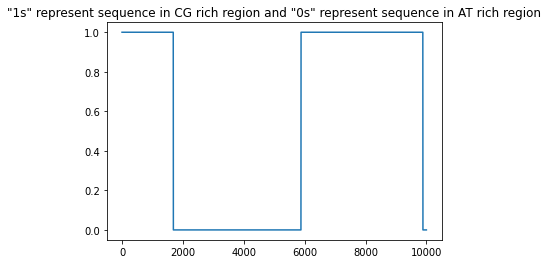

In [6]:
import random as rnd
import numpy.random
import matplotlib.pyplot as plt
ATrich = { "A":0.2698, "T":0.3237, "C":0.2080, "G":0.1985}
CGrich = { "A":0.2459, "T":0.2079, "C":0.2478, "G":0.2984}
ATtoCG = 0.0002
CGtoAT = 0.0003
states = ["A","C"]
current_state = rnd.choice(states)
length = 10000
# function from https://stackoverflow.com/questions/3679694/a-weighted-version-of-random-choice
def weighted_choice(choices):
   total = sum(w for c, w in choices.items())
   r = rnd.uniform(0, total)
   upto = 0
   for c, w in choices.items():
      if upto + w >= r:
         return c
      upto += w
   assert False, "Shouldn't get here"

def generate_HMM(at_cg,cg_at,at_rich,cg_rich,length,current_state):
  predicted_seq = ""
  statesteps = ""
  for i in range(length):
    if current_state == "A":
      Nucleotide = weighted_choice(at_rich)
      if numpy.random.binomial(1,at_cg)==1: current_state="C"
    if current_state == "C":
      Nucleotide = weighted_choice(cg_rich)
      if numpy.random.binomial(1,cg_at)==1: current_state="A"
    predicted_seq += Nucleotide
    #print(current_state)
    statesteps += current_state
  return predicted_seq,statesteps
HMM_seq , steps = generate_HMM(ATtoCG,CGtoAT,ATrich,CGrich,length,current_state)
print('simulated sequence:',HMM_seq)
print('sequence steps    :',steps)
encoder_arr = [0]*length
encoder = { 'C':1 , 'A':0 } # C stands for CG rich, A stands for AT rich
for j in range(length):
  encoder_arr[j] = encoder[steps[j]]
print(encoder_arr)
plt.plot(encoder_arr)
plt.title('"1s" represent sequence in CG rich region and "0s" represent sequence in AT rich region')

1. Due to the probability to change state is very rare, the sequence only show change in state in 10000 times of running

## **Task 5**
- Write a viterbi algorithm for finding the most likely CG regions and find a way of drawing this


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

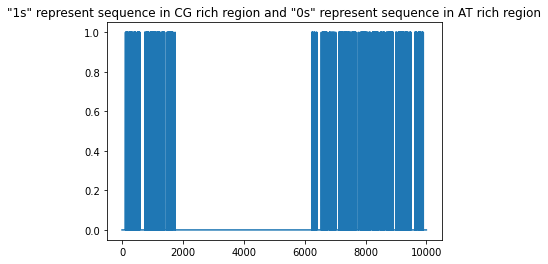

In [7]:
from scipy.special import logsumexp
import numpy as np

states = ('ATrich', 'CGrich')

observations = tuple(HMM_seq)

start_probability = {'ATrich': np.log(0.5), 'CGrich': np.log(0.5)}

transmission_probability = {
    'ATrich' : {'ATrich':np.log(0.9998) , 'CGrich':np.log(0.0002)},
    'CGrich' : {'CGrich':np.log(0.9997) , 'ATrich':np.log(0.0003)},
}
emission_probability = {
   'ATrich' : {'A': np.log(0.2698), 'T': np.log(0.3237), 'C': np.log(0.2080), 'G':np.log(0.1985)},
   'CGrich' : {'A': np.log(0.2459), 'T': np.log(0.2079), 'C': np.log(0.2478), 'G':np.log(0.2984)},
  }
def viterbi(obs ,states, s_pro, t_pro, e_pro):
  path = { s:[] for s in states}
  curr_pro = {}
  #pro_path = { s:[] for s in states}
  count = 0
  for s in states:
    curr_pro[s] = s_pro[s]+e_pro[s][obs[0]]
  for i in range(1,len(obs)):
    last_pro = curr_pro
    #print(last_pro)
    curr_pro = {}
    for curr_state in states:
      max_pro, last_sta = max(((last_pro[last_state]+t_pro[last_state][curr_state]+e_pro[curr_state][obs[i]],last_state) \
                   for last_state in states))
      curr_pro[curr_state] = max_pro
      path[curr_state].append(last_sta)
      #pro_path[curr_state].append(max_pro)
  # find the final largest probability
  # print(path)
  max_pro = -1
  max_path = {}
  #max_pro_path = {}
  for s in states:
    path[s].append(s)
    if curr_pro[s]<max_pro:
      max_path = path[s]
      #max_pro_path = pro_path[s]
      max_pro = curr_pro[s]
  return max_path
#encode CG:1 and AT:0
#plot out where the sequence is CG or AT rich
viterbi_predicted = viterbi(observations,states,start_probability,transmission_probability,emission_probability)
encoder_arr = [0]*len(observations)
encoder = { 'CGrich':1 , 'ATrich':0 } 
for j in range(len(observations)):
  encoder_arr[j] = encoder[viterbi_predicted[j]]
print(encoder_arr)
plt.plot(encoder_arr)
plt.title('"1s" represent sequence in CG rich region and "0s" represent sequence in AT rich region')
print(viterbi_predicted)


**Explanation**: Encoder shows '1' represents CG rich and '0' represents ATrich, Reason behind such an inaccuracy between generated and viterbi predicted is that maybe due to the probabilty of emission for each nucleotides are very close and also the sums of many log(probability) give rise to rounding errors.

## **Task 6**
- Run this on the genome for the Lambda Phage or here

['CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich', 'CGrich',

Text(0.5, 1.0, '"1s" represent sequence in CG rich region and "0s" represent sequence in AT rich region')

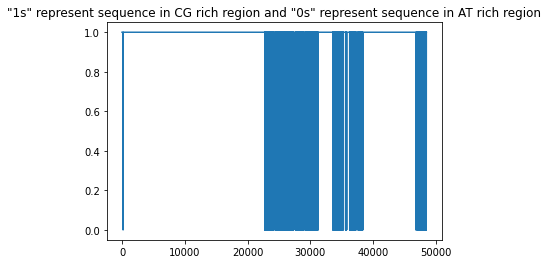

In [13]:
with open("phaseLambda.fasta.txt", "r") as seqfile:
  sequence = [x.strip() for x in seqfile.readlines()]
  sequence = ''.join(sequence)
viterbi_predicted_phaselambda = viterbi(sequence,states,start_probability,transmission_probability,emission_probability)
print(viterbi_predicted_phaselambda)
encoder_arr = [0]*len(sequence)
encoder = { 'CGrich':1 , 'ATrich':0 }
for j in range(len(sequence)):
  encoder_arr[j] = encoder[viterbi_predicted_phaselambda[j]]

plt.plot(encoder_arr)
plt.title('"1s" represent sequence in CG rich region and "0s" represent sequence in AT rich region')
